# Covid Patient Prediction Project

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,10)})

In [3]:
df = pd.read_csv('covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/2020,2/5/2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/2020,1/4/2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   199999 non-null  object
 1   sex                  199999 non-null  int64 
 2   patient_type         199999 non-null  int64 
 3   entry_date           199999 non-null  object
 4   date_symptoms        199999 non-null  object
 5   date_died            199999 non-null  object
 6   intubed              199999 non-null  int64 
 7   pneumonia            199999 non-null  int64 
 8   age                  199999 non-null  int64 
 9   pregnancy            199999 non-null  int64 
 10  diabetes             199999 non-null  int64 
 11  copd                 199999 non-null  int64 
 12  asthma               199999 non-null  int64 
 13  inmsupr              199999 non-null  int64 
 14  hypertension         199999 non-null  int64 
 15  other_disease        199999 non-nu

In [5]:
df.date_died.value_counts()

9999-99-99    175367
8/6/2020         492
16-06-2020       491
10/6/2020        485
12/6/2020        479
               ...  
18-03-2020         2
24-03-2020         2
22-03-2020         1
23-03-2020         1
20-03-2020         1
Name: date_died, Length: 103, dtype: int64

### EDA

<AxesSubplot:xlabel='covid_res', ylabel='count'>

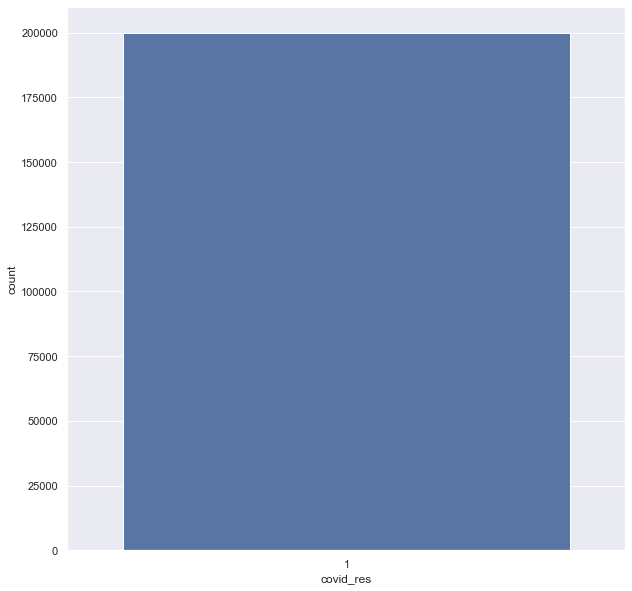

In [6]:
sns.countplot(data=df, x='covid_res')

In [7]:
# Drop the pending result
filtered_df = df[df['covid_res'] != 3]

<AxesSubplot:xlabel='covid_res', ylabel='count'>

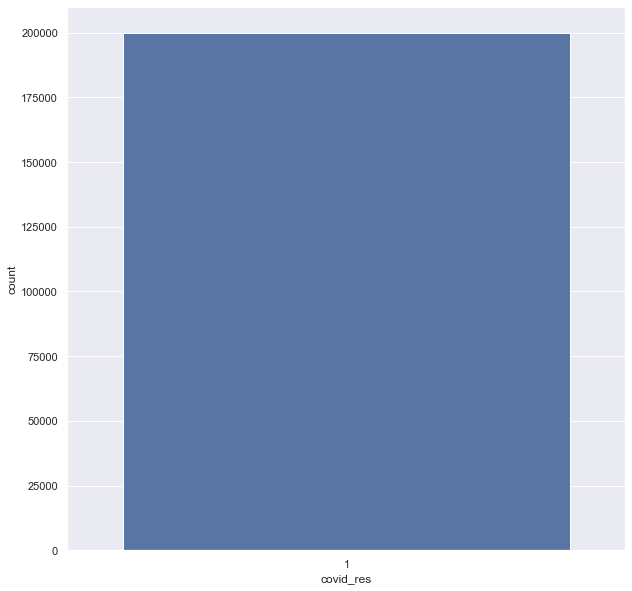

In [8]:
sns.countplot(data=filtered_df, x='covid_res')

<AxesSubplot:xlabel='covid_res', ylabel='count'>

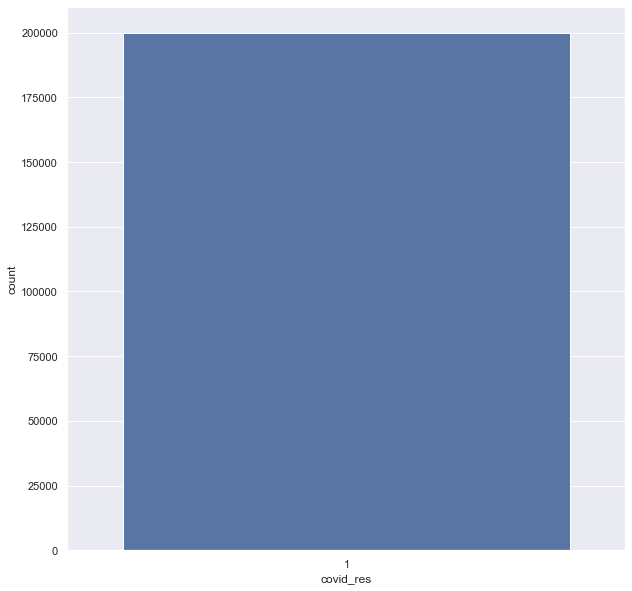

In [9]:
filtered_df.replace(2, 0, inplace=True)
sns.countplot(data=filtered_df, x='covid_res')

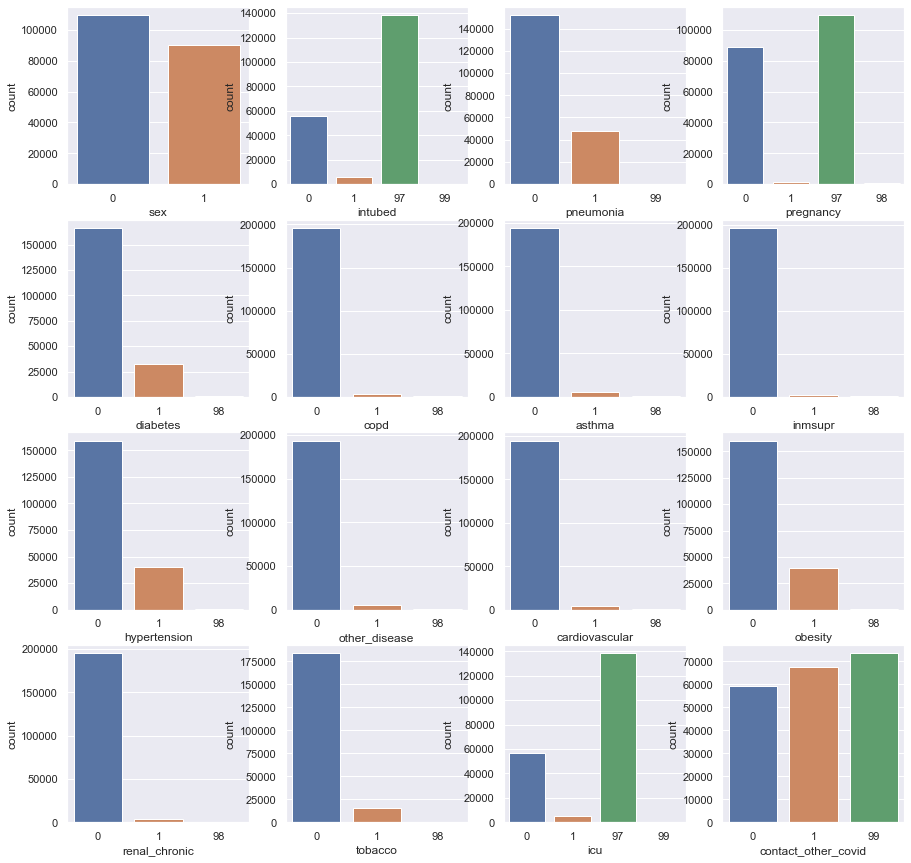

In [10]:
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

features = [
    ['sex', 'intubed', 'pneumonia', 'pregnancy'],
    ['diabetes', 'copd', 'asthma', 'inmsupr'],
    ['hypertension', 'other_disease', 'cardiovascular', 'obesity'],
    ['renal_chronic', 'tobacco', 'icu', 'contact_other_covid']
    ]

for i in range(4):
    for j in range(4):
        col = features[i][j]
        sns.countplot(data=filtered_df, x=col, ax=ax[i][j])

<AxesSubplot:xlabel='patient_type', ylabel='count'>

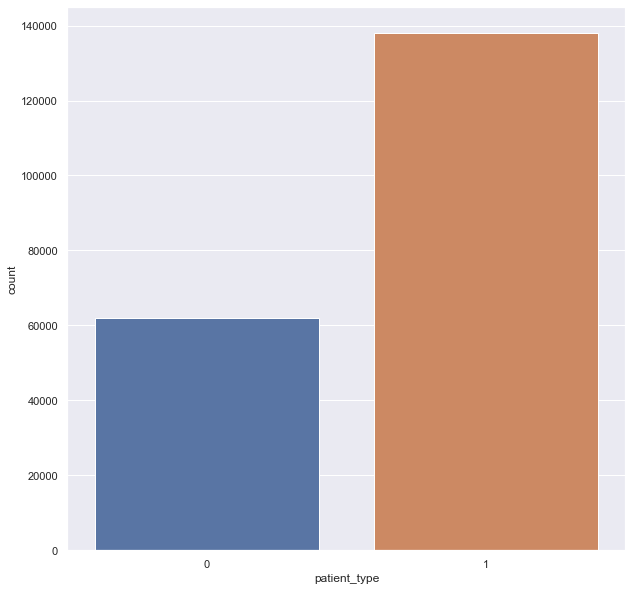

In [11]:
sns.countplot(data=filtered_df, x='patient_type')

<AxesSubplot:xlabel='age', ylabel='Count'>

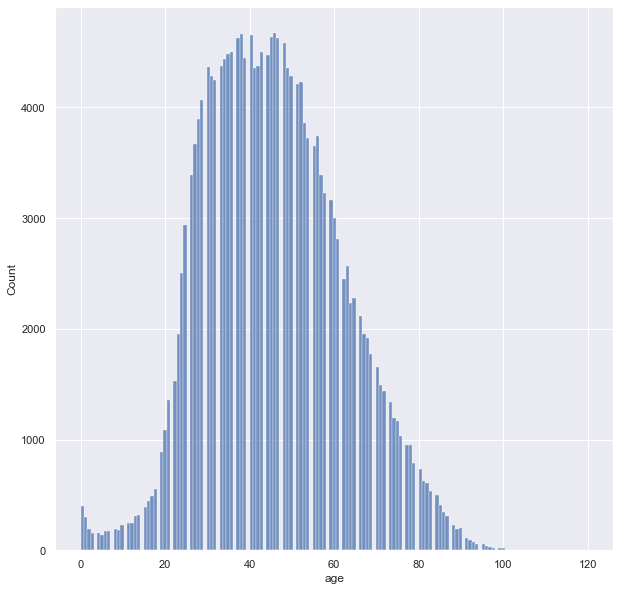

In [12]:
sns.histplot(data=df, x='age')

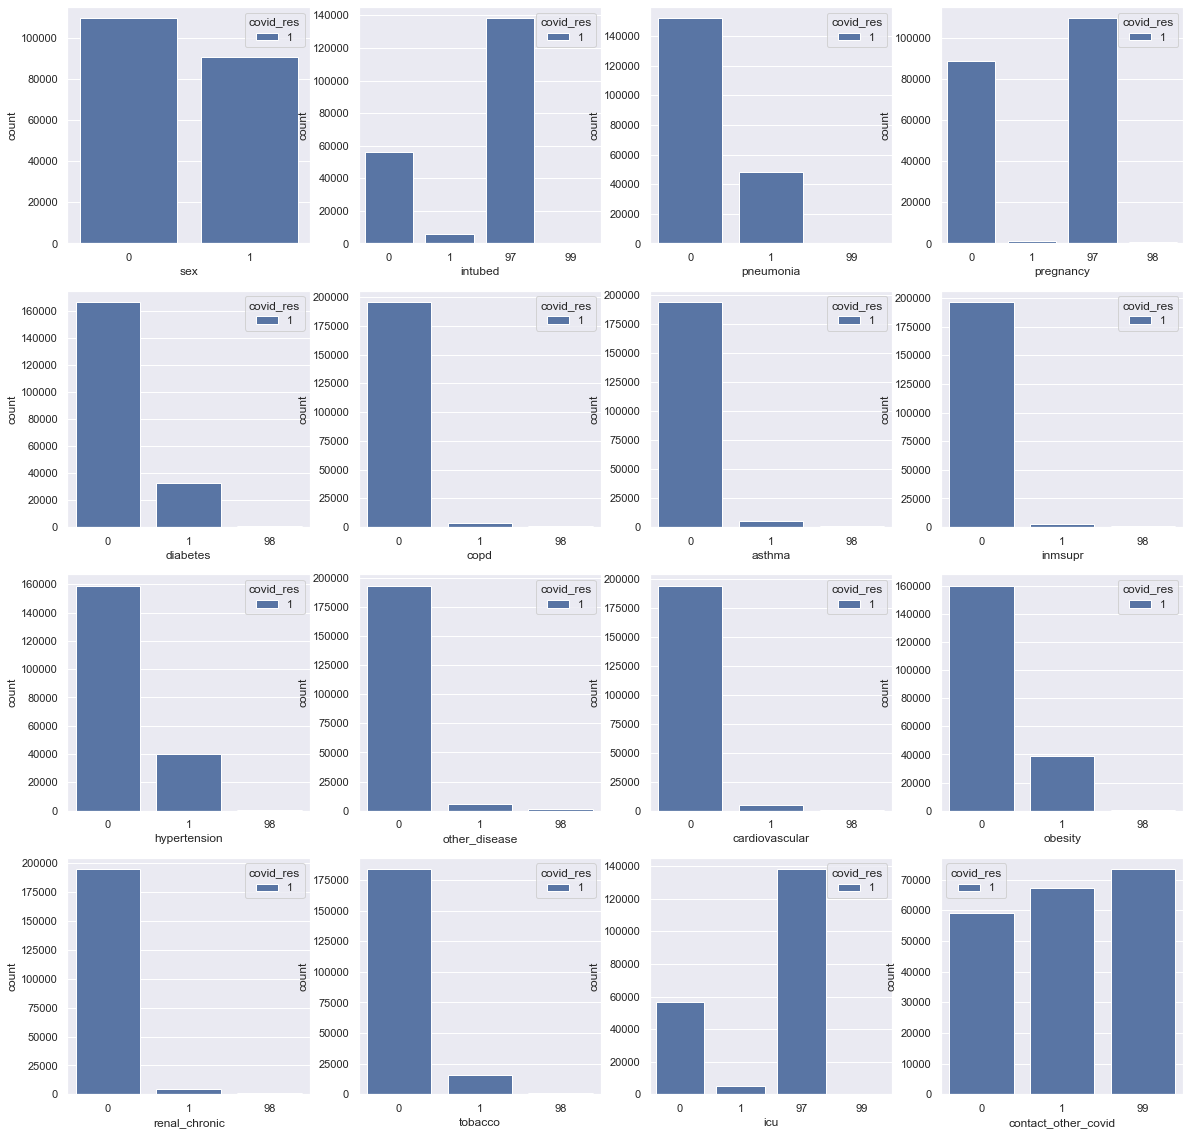

In [13]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

features = [
    ['sex', 'intubed', 'pneumonia', 'pregnancy'],
    ['diabetes', 'copd', 'asthma', 'inmsupr'],
    ['hypertension', 'other_disease', 'cardiovascular', 'obesity'],
    ['renal_chronic', 'tobacco', 'icu', 'contact_other_covid']
    ]

for i in range(4):
    for j in range(4):
        col = features[i][j]
        sns.countplot(data=filtered_df, x=col, hue='covid_res', ax=ax[i][j])

<AxesSubplot:>

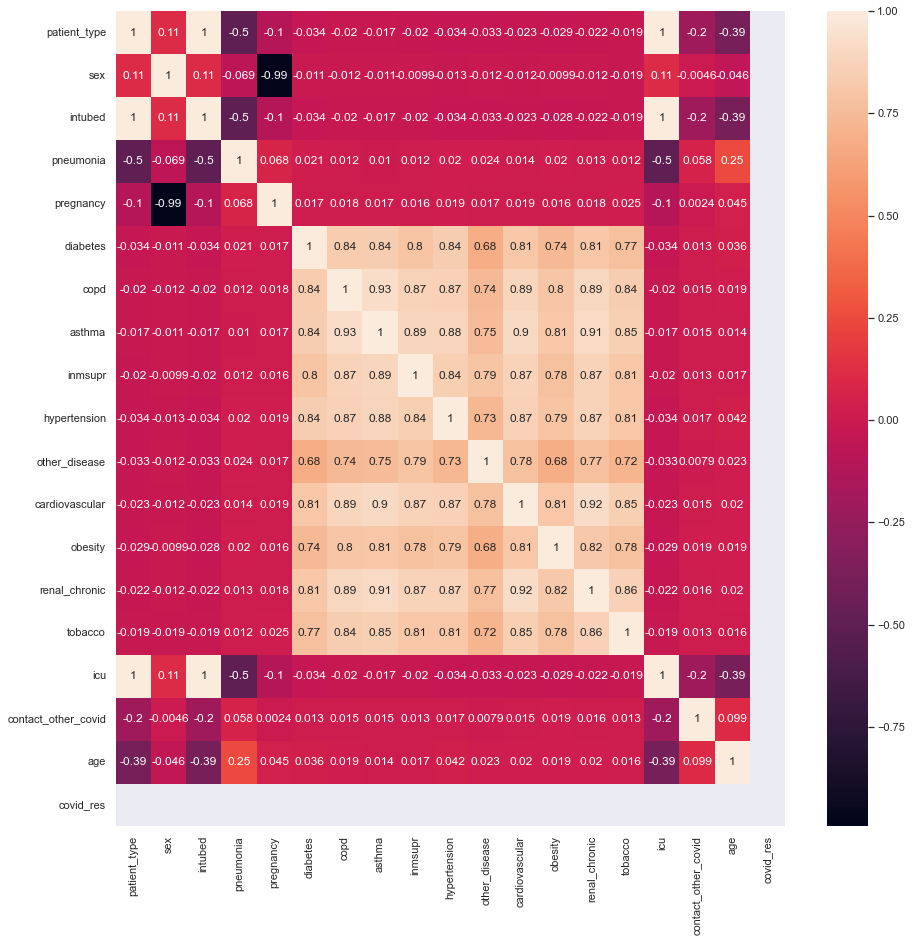

In [14]:
features = ['patient_type', 'sex', 'intubed', 'pneumonia', 'pregnancy',
            'diabetes', 'copd', 'asthma', 'inmsupr',
            'hypertension', 'other_disease', 'cardiovascular', 'obesity',
            'renal_chronic', 'tobacco', 'icu', 'contact_other_covid', 'age', 'covid_res']
    
corr = filtered_df[features].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

## Feature Engineering

In [15]:
filtered_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,0,1,4/5/2020,2/5/2020,9999-99-99,97,0,27,97,...,0,0,0,0,0,0,0,0,1,97
1,1009bf,0,1,19-03-2020,17-03-2020,9999-99-99,97,0,24,97,...,0,0,0,0,0,0,0,99,1,97
2,167386,1,0,6/4/2020,1/4/2020,9999-99-99,0,0,54,0,...,0,0,0,0,1,0,0,99,1,0
3,0b5948,0,0,17-04-2020,10/4/2020,9999-99-99,0,1,30,97,...,0,0,0,0,0,0,0,99,1,0
4,0d01b5,1,0,13-04-2020,13-04-2020,22-04-2020,0,0,60,0,...,0,1,0,1,0,0,0,99,1,0


In [16]:
filtered_df['entry_date'] = pd.to_datetime(filtered_df['entry_date'])
filtered_df['date_symptoms'] = pd.to_datetime(filtered_df['date_symptoms'])
filtered_df['died'] = filtered_df['date_died'].apply(lambda date: 1 if date == '9999-99-99' else 0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-04-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-04-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-04-2020' in DD/MM/YYYY format. Provide format or specif

In [17]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199998
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   199999 non-null  object        
 1   sex                  199999 non-null  int64         
 2   patient_type         199999 non-null  int64         
 3   entry_date           199999 non-null  datetime64[ns]
 4   date_symptoms        199999 non-null  datetime64[ns]
 5   date_died            199999 non-null  object        
 6   intubed              199999 non-null  int64         
 7   pneumonia            199999 non-null  int64         
 8   age                  199999 non-null  int64         
 9   pregnancy            199999 non-null  int64         
 10  diabetes             199999 non-null  int64         
 11  copd                 199999 non-null  int64         
 12  asthma               199999 non-null  int64         
 13  inmsupr       

In [18]:
filtered_df['symptoms_duration'] = filtered_df['date_symptoms'] - filtered_df['entry_date']
filtered_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died,symptoms_duration
0,16169f,0,1,2020-04-05,2020-02-05,9999-99-99,97,0,27,97,...,0,0,0,0,0,0,1,97,1,-60 days
1,1009bf,0,1,2020-03-19,2020-03-17,9999-99-99,97,0,24,97,...,0,0,0,0,0,99,1,97,1,-2 days
2,167386,1,0,2020-06-04,2020-01-04,9999-99-99,0,0,54,0,...,0,0,1,0,0,99,1,0,1,-152 days
3,0b5948,0,0,2020-04-17,2020-10-04,9999-99-99,0,1,30,97,...,0,0,0,0,0,99,1,0,1,170 days
4,0d01b5,1,0,2020-04-13,2020-04-13,22-04-2020,0,0,60,0,...,0,1,0,0,0,99,1,0,0,0 days


In [19]:
filtered_df['symptoms_duration'] = filtered_df['symptoms_duration'].dt.days
filtered_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died,symptoms_duration
0,16169f,0,1,2020-04-05,2020-02-05,9999-99-99,97,0,27,97,...,0,0,0,0,0,0,1,97,1,-60
1,1009bf,0,1,2020-03-19,2020-03-17,9999-99-99,97,0,24,97,...,0,0,0,0,0,99,1,97,1,-2
2,167386,1,0,2020-06-04,2020-01-04,9999-99-99,0,0,54,0,...,0,0,1,0,0,99,1,0,1,-152
3,0b5948,0,0,2020-04-17,2020-10-04,9999-99-99,0,1,30,97,...,0,0,0,0,0,99,1,0,1,170
4,0d01b5,1,0,2020-04-13,2020-04-13,22-04-2020,0,0,60,0,...,0,1,0,0,0,99,1,0,0,0


<AxesSubplot:xlabel='died', ylabel='count'>

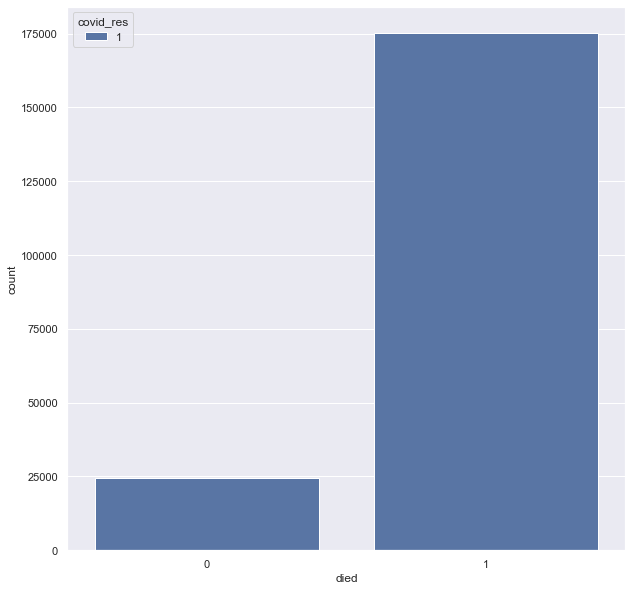

In [20]:
sns.countplot(data=filtered_df, x='died', hue='covid_res')

<AxesSubplot:xlabel='age', ylabel='symptoms_duration'>

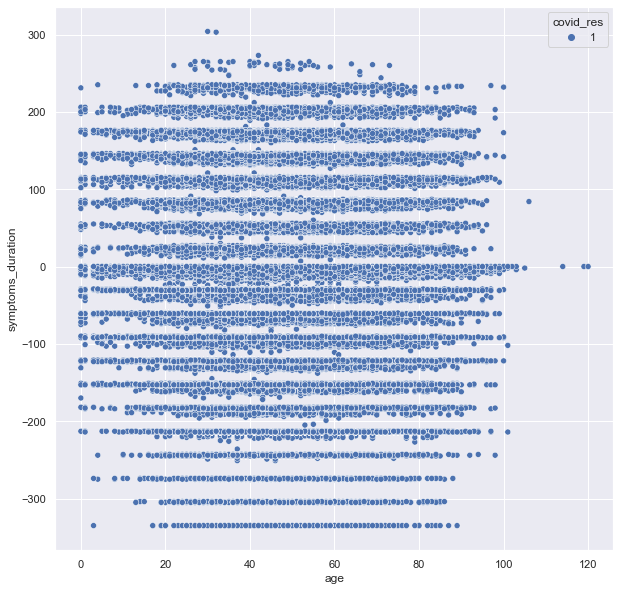

In [21]:
sns.scatterplot(data=filtered_df, x='age', y='symptoms_duration', hue='covid_res')

<AxesSubplot:>

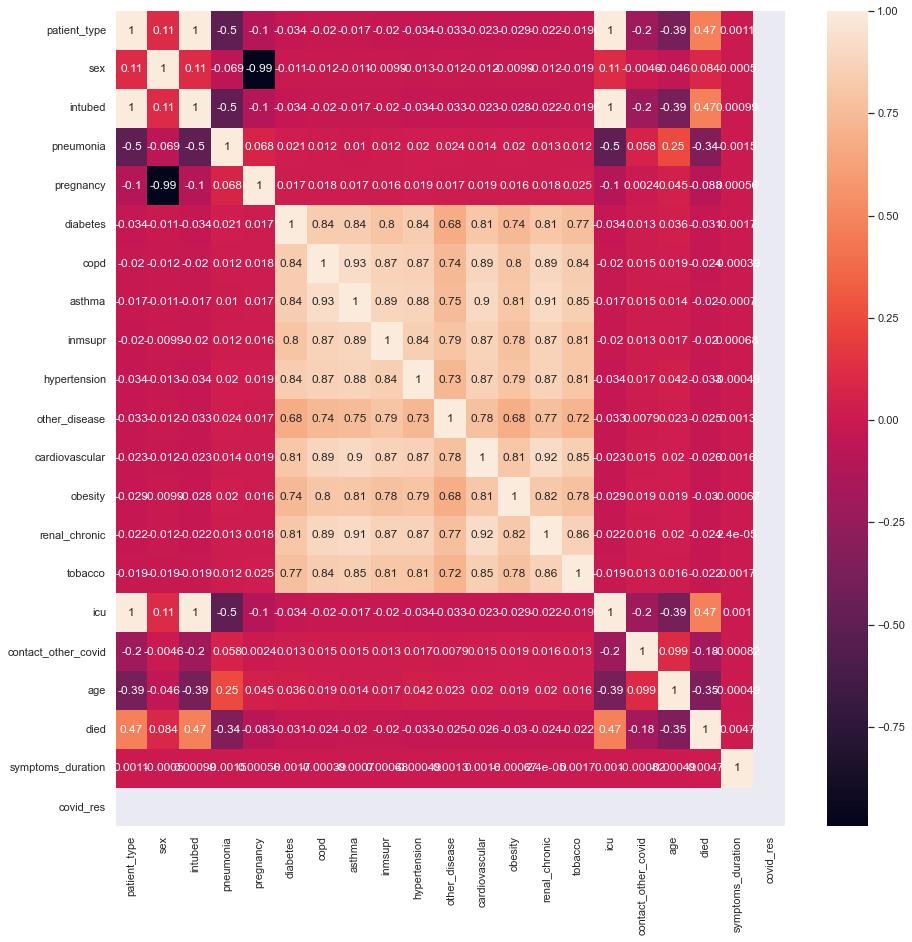

In [22]:
features = ['patient_type', 'sex', 'intubed', 'pneumonia', 'pregnancy',
            'diabetes', 'copd', 'asthma', 'inmsupr',
            'hypertension', 'other_disease', 'cardiovascular', 'obesity',
            'renal_chronic', 'tobacco', 'icu', 'contact_other_covid', 'age', 'died', 'symptoms_duration', 'covid_res']
    
corr = filtered_df[features].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

## Modelling

In [23]:
x = filtered_df[['sex', 'intubed', 'age', 'died', 'contact_other_covid', 'pneumonia', 'hypertension', 'obesity', 'diabetes']]
y = filtered_df['covid_res']

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train

,sex,intubed,age,died,contact_other_covid,pneumonia,hypertension,obesity,diabetes
26287,1,97,53,1,1,0,0,0,1
16870,0,97,53,1,0,0,0,0,0
167911,1,97,39,1,1,0,0,0,0
106024,0,97,67,1,1,0,0,0,0
186486,0,97,63,1,99,0,1,1,1
...,...,...,...,...,...,...,...,...,...
17301,0,0,81,1,99,1,0,0,0
25433,1,0,32,1,1,1,0,0,0
133327,1,0,64,0,99,1,1,0,1
23282,1,0,65,0,0,1,0,0,0


In [25]:
y_train

26287     1
16870     1
167911    1
106024    1
186486    1
         ..
17301     1
25433     1
133327    1
23282     1
79499     1
Name: covid_res, Length: 159999, dtype: int64

In [26]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier()
xgb = XGBClassifier()

In [27]:
rf.fit(x_train, y_train)
xgb.fit(x_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]

In [ ]:
rf_pred = rf.predict(x_test)
xgb_pred = xgb.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print("Random Forest Result: ")
print(classification_report(y_test, rf_pred))

print("XGBoost Result: ")
print(classification_report(y_test, xgb_pred))

In [ ]:
print(f"Random Forest Score: {rf.score(x_test, y_test)}")
print(f"XGBoost Score: {xgb.score(x_test, y_test)}")

## Save the model

In [28]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [29]:
import joblib

In [30]:
joblib.dump(xgb, 'model.h5')

['model.h5']

In [31]:
 df = pd.DataFrame.from_dict(
            {

                'sex':['Male']
            }
        )

df.head()

,sex
0,Male
